# 2D Design Template

# Overview

The purpose of this project is for you to apply what you have learnt in this course. This includes working with data and visualizing it, create model of linear regression, as well as using metrics to measure the accuracy of your model. 

Please find the project handout description in the following [link](https://edimension.sutd.edu.sg/webapps/blackboard/content/listContent.jsp?course_id=_5261_1&content_id=_184406_1).


## Deliverables

You need to submit this Jupyter notebook together with the dataset into Vocareum. Use the template in this notebook to work on this project. You are free to edit or add more cells if needed

## Students Submission

Student's Name:
- Ammond Wong Kar Jun (1007794)
- Loh Kun Hong (1007804)
- Lynette Teng Shin Yee (Ding Xingyin) (1008464)
- Tok Jing Huan (1008457) 

### Problem Statement

How Might We predict future crop production of Sub-Saharan Africa by analysing climate change factors? 


### Dataset

- Describe your dataset.
- Put the link to the sources of your raw dataset.
- Put python codes for loading the data into pandas dataframe(s). The data should be the raw data downloaded from the source. No pre-processing using any software (excel, python, etc) yet. Include this dataset in your submission
- Explain each column of your dataset (can use comment or markdown)
- State which column is the dependent variable (target) and explain how it is related to your problem statement
- State which columns are the independent variables (features) and describe your hypothesis on why these features can predict the target variable

### Dataset Descriptions

(**sub_saharan_africa_climate_data_1991_2023_v3.csv**)  
Link: https://www.kaggle.com/datasets/scholarsway/sub-saharan-africa-climate-data-1991-2023-v3-csv  
Description: sub_saharan_africa_climate_data_1991_2023_v3 is the current version of climate change data in subsahara African countries. It contains 49 African countries from 1991 to 2023.  
  
(**Production_Crops_E_Africa.csv**)  
Link: https://www.kaggle.com/datasets/imtkaggleteam/crop-production/data?select=Production_Crops_E_Africa.csv  
Description: Crop statistics for 173 products in Africa.

**From Climate Data dataset**  
Year - Year for which the climate data was collected, from 1991 - 2019  
Country/Region - The specific Sub-Saharan African country where the data was collected  
Rest of the Columns - Describes various climate change indicators which are Average Temperature (Celsius), Average Wind Speed (m/s), Average Humidity (%), Cloud Cover (%),  Precipitation (mm), Ocean Heat Content (10^22 Joules), Atmospheric CO2 (ppm), Ocean pH.

**From Production Crops Data**  
Area Code - An Index assigned to a specific country or region  
Area - The name of Country/Region where data is collected  
Item Code - An Index assigned to a specific type of crop farmed  
Item - The name of the crop  
Element Code - An Index assigned to type of data  
Element - Type of data, for each crop, 3 types of data are collected (Area Harvested (ha), Yield (hg/ha), Production (tonnes))  
Unit - refers to the unit used by each data type  
YXXXX - The columns name with the year, XXXX, prefixed by 'Y' contains data collected that year (1961 - 2019)  
YXXXXF - These columns are flags, these values describe the data, for eg F, Fc and M refer to FAO Estimate, Calculated and Missing Data respectively. Full list is found under flags.csv in the same link

**Target Column**  
Target Column is the yearly total production of all types of crops for all african countries involved. It does not originally exist in raw dataset, we consolidated the YXXX columns into rows of data corresponding to each year. It is directly related to our problem statement as we aim to find out how the crop production is affected by climate change.

**Feature Columns**  
Features are the year column (1991 - 2019), and all the climate change indicators columns. The columns can differentiate climate change into its different components. It is well known that Africa's agriculture sector is heavily impacted by climate change due to the more primitive methods of farming used. The different indicators can make our model more specific in identifying the type of climate change that impacts the crop production rates.

In [1]:
# put Python code to load the raw data

# importing of relevant library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import seaborn as sns


#importing of climate data
df_climate = pd.read_csv('sub_saharan_africa_climate_data_1991_2023_v3.csv')

#importing of production crop data using latin-1 encoding 
df_crop = pd.read_csv("Production_Crops_E_Africa.csv", encoding="latin-1")



### Clean & Analyze your data
Use python code to:
- Clean your data
- Calculate Descriptive Statistics and other statistical analysis
- Visualization with meaningful analysis description

In [2]:
# clean data

#ALL CLEANED DATA ARE STILL IN TYPE DATAFRAME!!!

# for df_climate, sum all respective climate data per year for each country and find average

#prep columns for cleaned dataframe
columns = df_climate.columns.tolist()
columns.remove('Country/Region')

#make new dataframe with columns 
df_climate_cleaned = pd.DataFrame(columns = columns)

for year in range(1991,2020):
    # extract relevent data based on year remove country data
    data_year = pd.DataFrame(df_climate[df_climate['Year'] == year]).drop('Country/Region' , axis = 1)
    
    #add new entry into cleaned dataset
    df_climate_cleaned.loc[len(df_climate_cleaned)] = data_year.mean()

# print(df_climate_cleaned.shape)

#for df_crop, remove area harvest and yield, combine all types of crops under the same country and change tonnes to mega tonnes
# print(df_crop)

df_crop_cleaned = pd.DataFrame()
for year in range(1991,2020):
    year = "Y" + str(year)
    for area in df_crop['Area'].unique():
        # print(year, area)
        
        #filter data for that year based on selected area and getting only 
        area_data = pd.DataFrame(df_crop[(df_crop['Area'] == area) & (df_crop['Element'] == 'Production')][[year]])
        # print(area, area_data)
        
        #Sum and convert to megatonnes
        total_production = area_data.sum()/ 1000000 
        # print(total_production, area)
        
        #add to cleaned dataframe
        df_crop_cleaned.loc[year,area] = total_production.iloc[0]
    total_year = df_crop_cleaned.loc[year,:].sum()
    # print(total_year)
    
    #find sum of production for the whole year
    df_crop_cleaned.loc[year, 'total'] = total_year
    df_crop_cleaned = df_crop_cleaned.reset_index(drop = True)
    
# print(df_crop_cleaned.shape)
#merge both data set into 1
df =  pd.concat([df_climate_cleaned, df_crop_cleaned], axis = 1)

# print(df)

In [3]:
# descriptive statistics
print(df.describe())

              Year  Avg. Temp (°C)  Avg. Wind Speed (m/s)  Avg. Humidity (%)  \
count    29.000000       29.000000              29.000000          29.000000   
mean   2005.000000       25.819409               3.492280          58.078051   
std       8.514693        0.437862               0.222890           1.084725   
min    1991.000000       25.017551               3.054898          56.133469   
25%    1998.000000       25.552449               3.329184          57.229592   
50%    2005.000000       25.761020               3.485306          58.135306   
75%    2012.000000       26.144694               3.655714          59.015306   
max    2019.000000       26.864694               3.903061          59.824082   

       Cloud Cover (%)  Precipitation (mm)  Ocean Heat Content (10²² J)  \
count        29.000000           29.000000                    29.000000   
mean         49.571309          727.209937                     1.244194   
std           1.474491           21.456120            

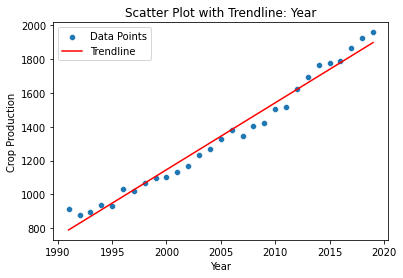

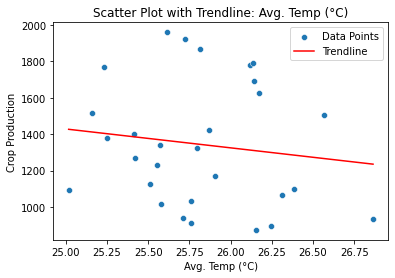

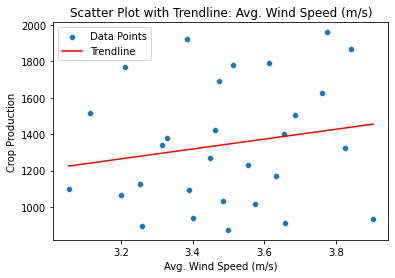

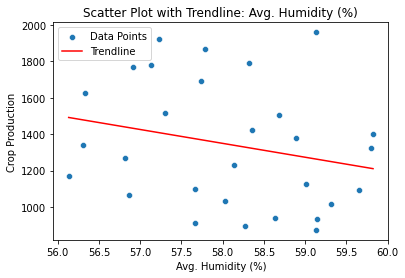

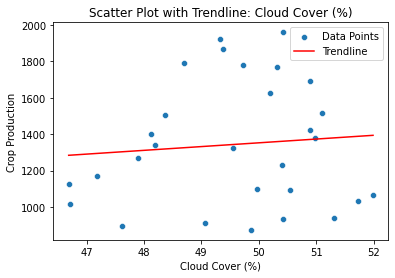

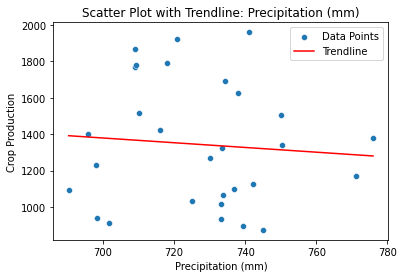

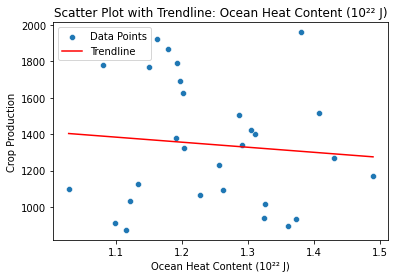

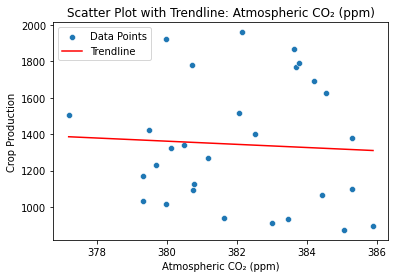

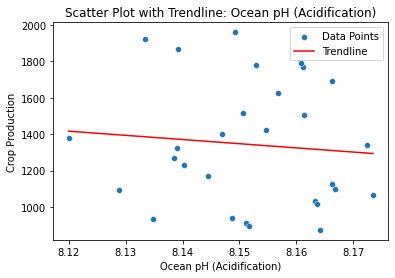

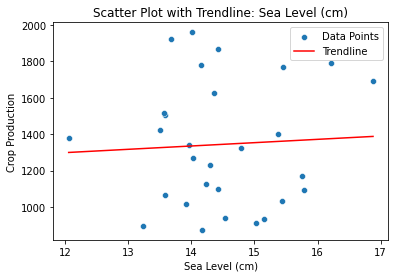

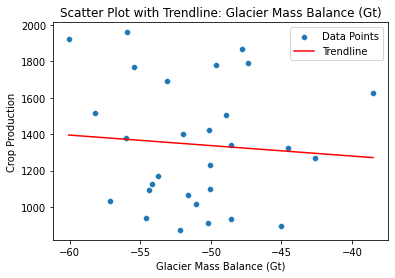

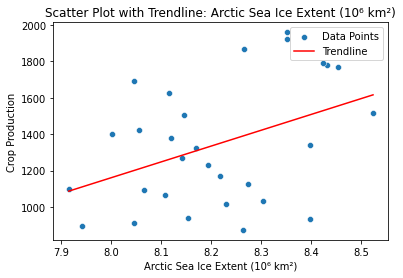

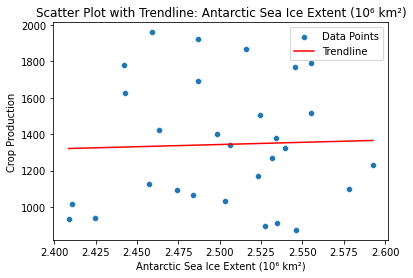

In [4]:
# visualization with analysis
# plot crop production against climate changes

columns_to_plot = columns.copy()
# columns_to_plot.remove('Year')

# Set the ylabel once outside the loop
    
for column in columns_to_plot:
    plt.figure()  # Create a new figure for each plot
    
    # Scatter plot using seaborn
    myplot = sns.scatterplot(x=column, y='total', data=df, label='Data Points')
    
    # Add a trendline
    x = df[column].values
    y = df['total'].values
    
    # Remove NaN values if present
    mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[mask]
    y = y[mask]
    
    # Fit a linear trendline
    coefficients = np.polyfit(x, y, 1)  # 1st-degree polynomial (linear)
    trendline = np.polyval(coefficients, np.sort(x))
    
    # Plot the trendline
    plt.plot(np.sort(x), trendline, color='red', label='Trendline')
    
    # Customize labels
    myplot.set_xlabel(column)  # Set x-axis label
    myplot.set_ylabel('Crop Production')  # Set y-axis label
    plt.title(f'Scatter Plot with Trendline: {column}')
    plt.legend()  # Show legend

    # Show the plot
    plt.show()

### Features and Target Preparation

Prepare features and target for model training.

In [5]:
#Relevant Functions

def get_features_targets(df: pd.DataFrame, 
                         feature_names: list[str], 
                         target_names: list[str]) -> tuple[pd.DataFrame, pd.DataFrame]:
    df_feature = pd.DataFrame(df.loc[:,feature_names])
    df_target = pd.DataFrame(df.loc[:,target_names])
    return df_feature, df_target

def normalize_minmax(array_in: np.ndarray, columns_mins: np.ndarray=None, 
                     columns_maxs: np.ndarray=None) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    
    out = array_in.copy()
    if columns_mins is None:
        columns_mins = np.min(out, axis=0)
        columns_mins = columns_mins.reshape(1, -1)  # Reshape to 2D (1 row, n columns)
    
    if columns_maxs is None:
        columns_maxs = np.max(out, axis=0)
        columns_maxs = columns_maxs.reshape(1, -1)  
    out = (out-columns_mins)/(columns_maxs-columns_mins)
    return out, columns_mins, columns_maxs

def prepare_feature(np_feature: np.ndarray) -> np.ndarray:
    no_row = np_feature.shape[0]
    ones = np.ones((no_row,1))
    return np.concatenate((ones,np_feature), axis =1)

def split_data(df_feature: pd.DataFrame, df_target: pd.DataFrame, 
               random_state: int=None, 
               test_size: float=0.5) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    
    np.random.seed(random_state)
    
    df_feature_test_index = np.random.choice(df_feature.index, size = int(test_size*df_feature.shape[0]), replace = False)
    
    df_feature_test = df_feature.loc[df_feature_test_index,:]
    df_feature_train = df_feature.drop(df_feature_test_index, axis = 0)
    
    df_target_test = pd.DataFrame(df_target.loc[df_feature_test_index,:])
    df_target_train = df_target.drop(df_feature_test_index, axis = 0)
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test

def predict_linreg(array_feature: np.ndarray, beta: np.ndarray, mins, maxs) -> np.ndarray:
    # normalize array_feature
    normalized_array, mins, maxs = normalize_minmax(array_feature, mins , maxs)

    #add ls to array_feature matrix 
    array_feature = prepare_feature(normalized_array)

    #predict (use calc_linreg)
    prediction = calc_linreg(array_feature, beta)
    return prediction

def calc_linreg(X: np.ndarray, beta: np.ndarray) -> np.ndarray:
    return np.matmul(X,beta)

def r2_score(y: np.ndarray, ypred: np.ndarray) -> float:
    ss_res = np.sum((y - ypred)**2)
    ss_tot = np.sum((y - np.mean(ypred))**2)
    return 1-(ss_res/ss_tot)

def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

def mean_squared_error(target: np.ndarray, pred: np.ndarray) -> float:
    n = target.shape[0]
    mse = (1/n)*(np.sum((target-pred)**2))
    return mse

def compute_cost_linreg(X: np.ndarray, y: np.ndarray, beta: np.ndarray) -> np.ndarray:
    y_hat = np.matmul(X,beta)
    J = (1/(2*(X.shape[0]))) * np.matmul((y_hat - y).T, (y_hat - y))
    return np.squeeze(J)

def gradient_descent_linreg(X: np.ndarray, y: np.ndarray, beta: np.ndarray, 
                            alpha: float, num_iters: int) -> tuple[np.ndarray, np.ndarray]:
    J_storage = []
    for i in range(num_iters):
        J_storage.append(compute_cost_linreg(X, y, beta))
        beta = beta - np.matmul((alpha/X.shape[0])*X.T , (calc_linreg(X,beta) - y))
    return beta, J_storage


In [6]:
# put Python code to prepare your features and target
#seperate into features data and targets
features_name = columns_to_plot #col of features
# print(len(features_name))
df_features, df_targets = get_features_targets(df, features_name, 'total') #this is in type DataFrame 

#still in type dataframe, split the data into training and testing sets
df_features_train, df_features_test, df_targets_train, df_targets_test = split_data(df_features, df_targets, 0, 0.3)

#convert to all training dataframes to numpy
#normalize the training features based on min_max
np_features_train_norm, mins, maxs = normalize_minmax(df_features_train.to_numpy())

np_targets_train = df_targets_train.to_numpy()

#prep features
np_features_train_norm = prepare_feature(np_features_train_norm) 


### Building Model

Use python code to build your model. Give explanation on this process.

In [7]:
# put Python code to build your model
#prep for gradient_descent_linreg(x,y,beta,alpha,iter)
iterations: int = 34500
alpha: float = 0.02
beta: np.ndarray = np.zeros((np_features_train_norm.shape[1],1))

#do gradient descent
beta, J_storage = gradient_descent_linreg(np_features_train_norm, np_targets_train, beta, alpha, iterations)


### Evaluating the Model

- Describe the metrics of your choice
- Evaluate your model performance

R2: 0.948301247807135
Adjusted R2: 0.8522892794489572
Mean Square Error: 6556.611686961699
Root Mean Square Error: 80.97290711689743
RMSE as a percentage of total range: 7.883295041473236 %


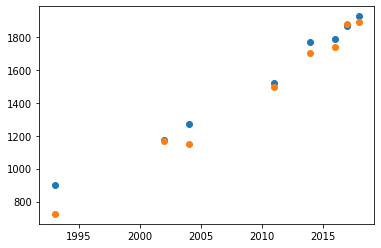

In [8]:
# put Python code to test & evaluate the model
y_hat = predict_linreg(df_features_test.to_numpy(), beta, mins ,maxs)
      
r2 = r2_score(df_targets_test.to_numpy(), y_hat)
print('R2:',r2)
a_r2 = adjusted_r2(float(r2), df_features_train.shape[0], df_features_test.shape[1])

mse = mean_squared_error(df_targets_test.to_numpy(), y_hat)
rmse = mse **0.5


_, tmins, tmaxs = normalize_minmax(df_targets_test.to_numpy())
rmse_percentage = float((rmse/(tmaxs-tmins))*100)

print('Adjusted R2:',a_r2)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('RMSE as a percentage of total range:', rmse_percentage, '%')

plt.scatter(df_features_test['Year'], df_targets_test.to_numpy())
plt.scatter(df_features_test['Year'], y_hat)

### Analysis of Results ###
To evaluate our model, we decided to use an adjusted R<sup>2</sup> value instead of a regular R<sup>2</sup> value. This is because R square results are heavily affected by the number of feature catagories there are in a model and as such may not be the most conclusive on the performance of the result.

To futher suppliment the evaluation and also to get values that are more meaningful to the context, the mean square error and root mean square error was also calculated and used to get a percentage error as compared to the range of test target values.

Evaluating our model, it seems that generally it is able to predict crop production rather accurately with a variation of about 80 mega tonnes in terms of total crop production or 7.8% of the total range of targets. However looking at the graph, not all relationships may be linear and may be over generalised as a result of linearization.

In an attempt to improve the model, a polynomial relationship will be used instead of a linear relationship. To do this, we must first determine the polynomial relationship between each feature and the target before feeding it into a combined equation for training and testing.

### Improving the Model

- Improve the models by performing any data processing techniques or hyperparameter tuning.
- You can repeat the steps above to show the improvement as compared to the previous performance

Note:
- You should not change or add dataset at this step
- You are allowed to use library such as sklearn for data processing (NOT for building model)
- Make sure to have the same test dataset so the results are comparable with the previous model 
- If you perform hyperparameter tuning, it will require you to split your training data further into train and validation dataset

Skipped fitting polynomial of degree 6 due to RankWarning.


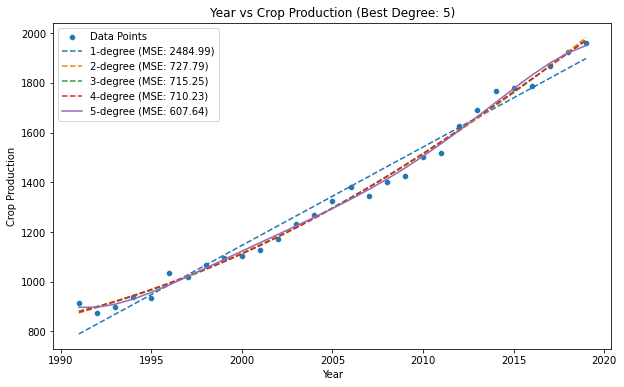

Skipped fitting polynomial of degree 7 due to RankWarning.


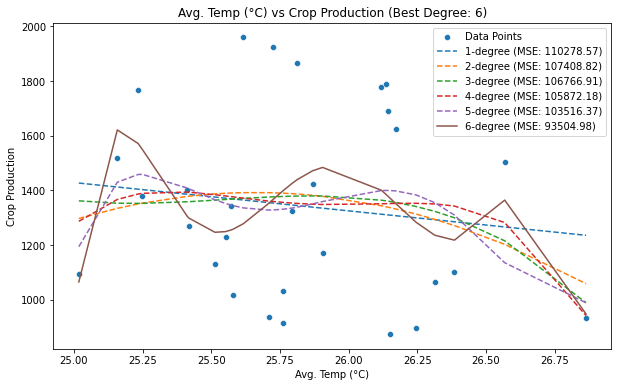

Skipped fitting polynomial of degree 10 due to RankWarning.


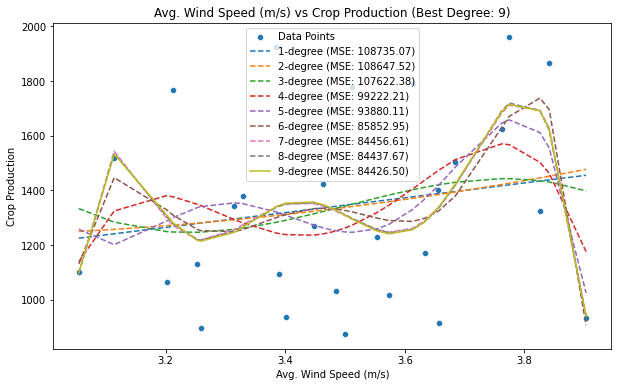

Skipped fitting polynomial of degree 7 due to RankWarning.


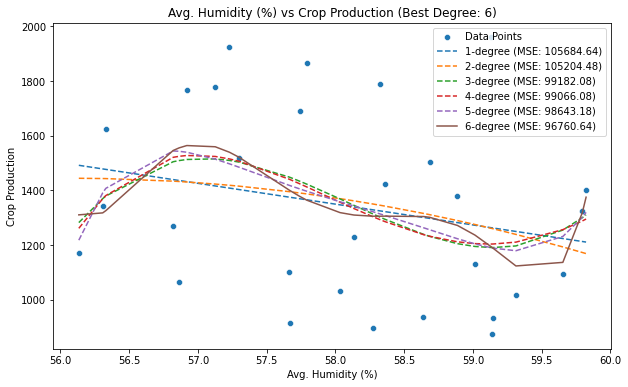

Skipped fitting polynomial of degree 8 due to RankWarning.


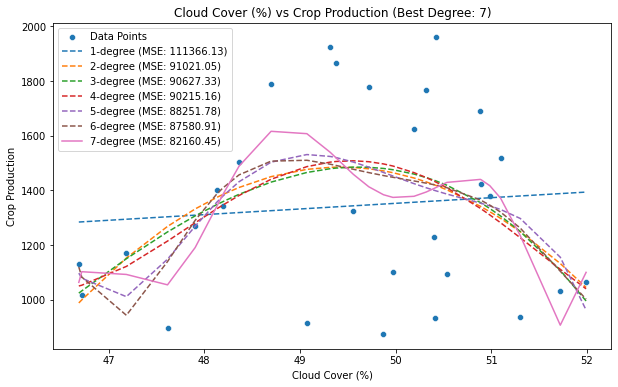

Skipped fitting polynomial of degree 8 due to RankWarning.


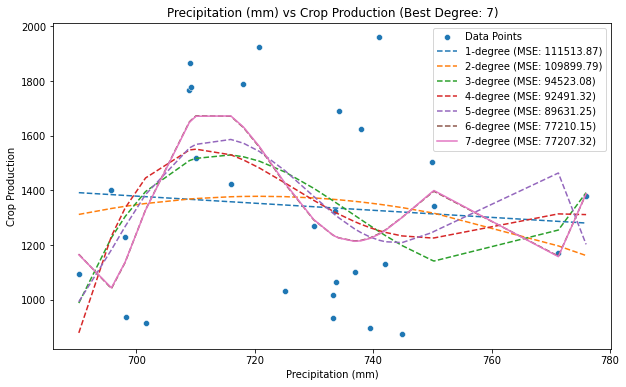

Skipped fitting polynomial of degree 11 due to RankWarning.


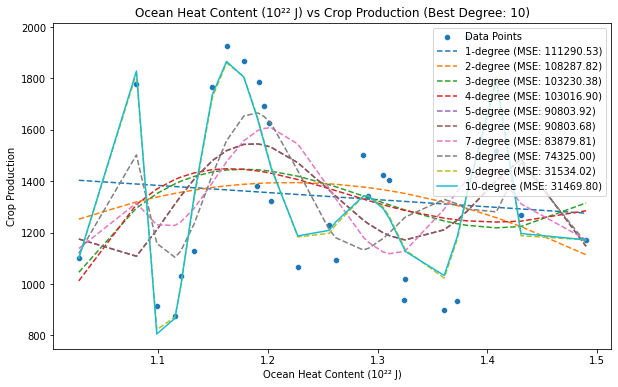

Skipped fitting polynomial of degree 6 due to RankWarning.


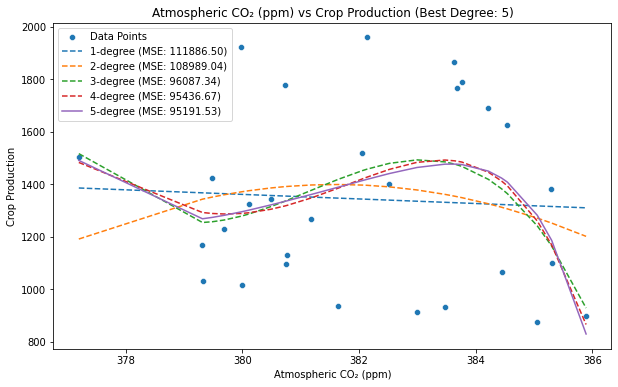

Skipped fitting polynomial of degree 5 due to RankWarning.


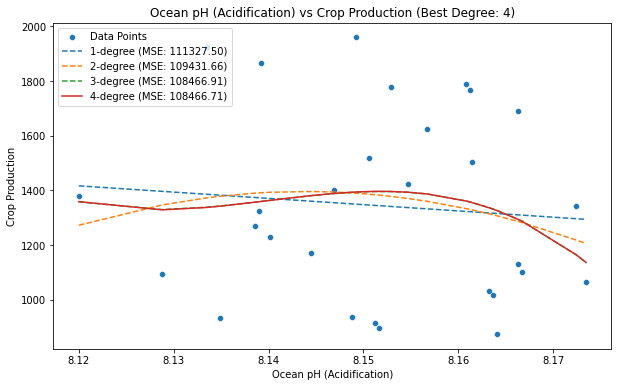

Skipped fitting polynomial of degree 10 due to RankWarning.


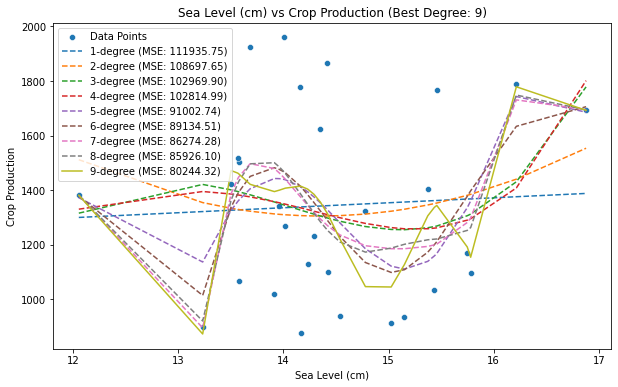

Skipped fitting polynomial of degree 11 due to RankWarning.


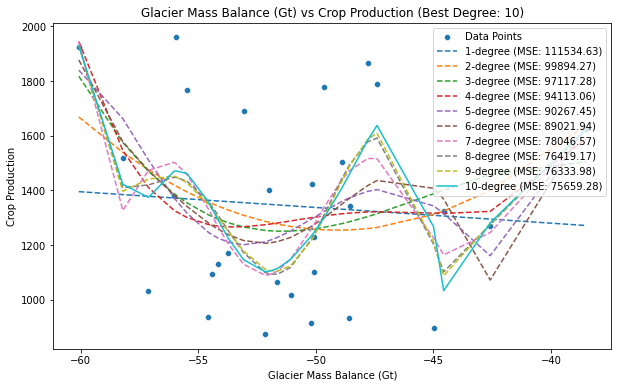

Skipped fitting polynomial of degree 7 due to RankWarning.


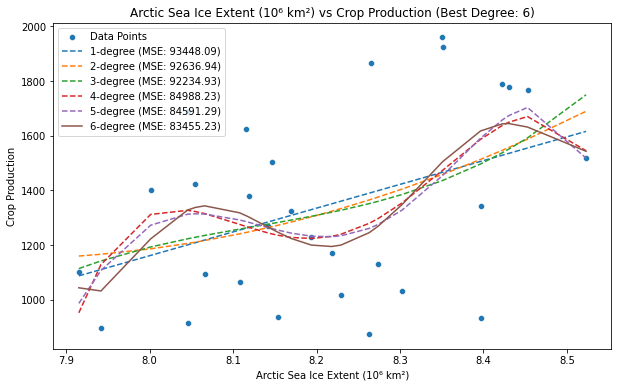

Skipped fitting polynomial of degree 7 due to RankWarning.


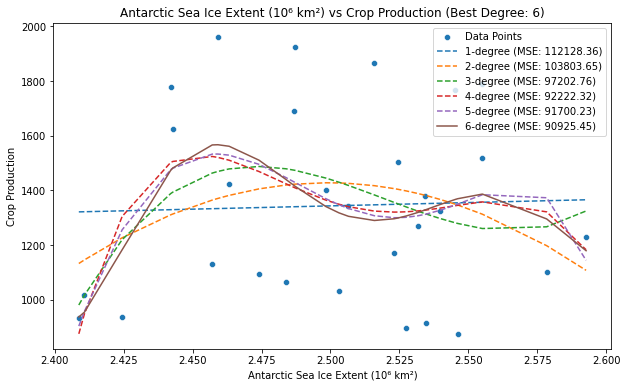

In [330]:
#Finding the polynormial degree of each feature
import warnings

# Function to fit polynomial and calculate error
def fit_and_evaluate_polynomial(x, y, degrees):
    errors = []
    for degree in degrees:
        try:
            with warnings.catch_warnings():
                warnings.simplefilter('error', np.RankWarning)  # Turn RankWarning into an exception
                # Fit polynomial
                coefficients = np.polyfit(x, y, degree)
            
            # Predict using the polynomial
            y_pred = np.polyval(coefficients, x)
            
            # Compute Mean Squared Error
            mse = mean_squared_error(y, y_pred)
            errors.append((degree, mse, coefficients))
        
        except np.RankWarning:
            print(f"Skipped fitting polynomial of degree {degree} due to RankWarning.")
            break  # Stops further iterations when RankWarning occurs
    
    return errors
 
# Define degrees to test
degrees_to_test = list(range(1, 15))  # Adjust as needed

# Assuming columns_to_plot is defined
polynormial_degree = []
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))  # Create a new figure for each plot

    # Scatter plot
    sns.scatterplot(x=column, y='total', data=df, label='Data Points')

    # Get x and y values
    x = df[column].dropna().values  # Drop NaN values
    y = df['total'].dropna().values
    
    # Fit polynomials and evaluate
    errors = fit_and_evaluate_polynomial(x, y, degrees_to_test)

    # Find the best polynomial degree based on the lowest error
    best_degree, best_mse, best_coefficients = min(errors, key=lambda x: x[1])
    polynormial_degree.append(best_degree)
    # Plot trendlines for all degrees to compare
    x_sorted = np.sort(x)
    for degree, mse, coefficients in errors:
        trendline = np.polyval(coefficients, x_sorted)
        label = f"{degree}-degree (MSE: {mse:.2f})"
        plt.plot(x_sorted, trendline, label=label, linestyle='--' if degree != best_degree else '-')
    
    # Plot customization
    plt.xlabel(column)
    plt.ylabel('Crop Production')
    plt.title(f'{column} vs Crop Production (Best Degree: {best_degree})')
    plt.legend()
    plt.show()
    
# polynormial_degree = np.array(polynormial_degree).reshape(-1,1)  

In [331]:
#apply polynormial power to the respective column data

#seperate into features data and targets
features_name = columns_to_plot #col of features

df_p_features, df_p_targets = get_features_targets(df, features_name, 'total') #this is in type DataFrame 

for idx in range(len(polynormial_degree)):
    power = polynormial_degree[idx]
    df_p_features.iloc[:,idx] = df_p_features.iloc[:, idx]**power
    
    
#still in type dataframe, split the data into training and testing sets
df_p_features_train, df_p_features_test, df_p_targets_train, df_p_targets_test = split_data(df_p_features, df_p_targets, 0, 0.3)

#convert to all training dataframes to numpy
#normalize the training features based on min_max
np_p_features_train_norm, mins_p, maxs_p = normalize_minmax(df_p_features_train.to_numpy())

np_p_targets_train = df_p_targets_train.to_numpy()

#prep features
np_p_features_train_norm = prepare_feature(np_p_features_train_norm) 


In [332]:
# put Python code to build your model
#prep for gradient_descent_linreg(x,y,beta,alpha,iter)
iterations: int = 80000
alpha: float = 0.02
beta_p: np.ndarray = np.zeros((np_p_features_train_norm.shape[1],1))

#do gradient descent
beta_p, J_storage = gradient_descent_linreg(np_p_features_train_norm, np_p_targets_train, beta_p, alpha, iterations)
print( J_storage[-1])

414.42218068518827


### Discussion and Analysis

- Analyze the results of your metrics.
- Explain how does your analysis and machine learning help to solve your problem statement.
- Conclusion

Adjusted R2 0.8628520694074995
Mean Square Error: 5941.533000992547
Root Mean Square Error 77.08134016084922
RMSE as a percentage of total range: 7.504423001670012 %


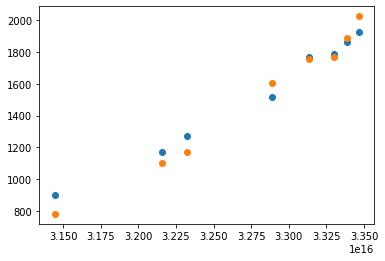

In [373]:
# put Python code to test & evaluate the model
y_p_hat = predict_linreg(df_p_features_test.to_numpy(), beta_p, mins_p ,maxs_p)
# y_p_hat = np.abs(y_p_hat)
# print(y_p_hat)
# print(df_p_targets_test)
r2_p = r2_score(df_p_targets_test.to_numpy(), y_p_hat)
a_p_r2 = adjusted_r2(float(r2_p), df_p_features_train.shape[0], df_p_features_test.shape[1])

mse_p = mean_squared_error(df_p_targets_test.to_numpy(), y_p_hat)
rmse_p = mse_p**0.5

_, tmins_p, tmaxs_p = normalize_minmax(df_p_targets_test.to_numpy())
rmse_p_percentage = float((rmse_p/(tmaxs_p-tmins_p))*100)

print('Adjusted R2',a_p_r2)
print('Mean Square Error:', mse_p)
print('Root Mean Square Error', rmse_p)
print('RMSE as a percentage of total range:', rmse_p_percentage, '%')

plt.scatter(df_p_features_test['Year'], df_p_targets_test.to_numpy())
plt.scatter(df_p_features_test['Year'], y_p_hat)

### Analysis of matrix ###

Using the same metrics as those used to evaluate the initial linear regression, there has been an increase in accuracy through out all 4 of the metrics used. However, the increase in accuracy was not very significant.